In [5]:
using AbstractPlotting, CairoMakie, AbstractPlotting.MakieLayout
using NCDatasets
using Base64
using Printf
using AvailablePotentialEnergyFramework
using JLD

In [6]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
#	output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
data_dir_apes = "/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs2/"

"/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs2/"

In [7]:
file_homoRad_homoSfc = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_1km_1000km_homoRad_homoSfc_2d.nc");

In [8]:
function read_data(filename,times)
    Dataset(filename) do ds
        psfc =variable(ds,"PSFC")[:,:,times] :: Array{Float32,3}
        u = variable(ds,"USFC")[:,:,times] :: Array{Float32,3}
        v = variable(ds,"VSFC")[:,:,times] :: Array{Float32,3}
        time = variable(ds,"time")[times] :: Array{Float32,1}
        sp = hypot.(u,v)
        #psfc = permutedims(psfc,(2,1,3))
        #sp = permutedims(sp,(2,1,3))
        psfc, sp, time
    end
end

read_data (generic function with 1 method)

In [9]:
time_slab = 1:2:720
psfc_homoRad_homoSfc,sp_homoRad_homoSfc,times = read_data(file_homoRad_homoSfc,time_slab);

In [16]:
time_idx = Node(1)

psfc_4 = @lift(psfc_homoRad_homoSfc[:,:,$time_idx])
sp_4 = @lift(sp_homoRad_homoSfc[:,:,$time_idx]);

time_string = @lift(@sprintf "Pressure and wind speed at the surface at day %5.1f, 1km grid-spacing" times[$time_idx])

Observable{String} with 0 listeners. Value:
"Pressure and wind speed at the surface at day   0.0, 1km grid-spacing"

In [18]:
timeindices = 1:length(times)

1:360

In [19]:
x = y = range(0,stop=1024,length=1024)

0.0:1.0009775171065494:1024.0

In [20]:
time_idx[] = 1

1

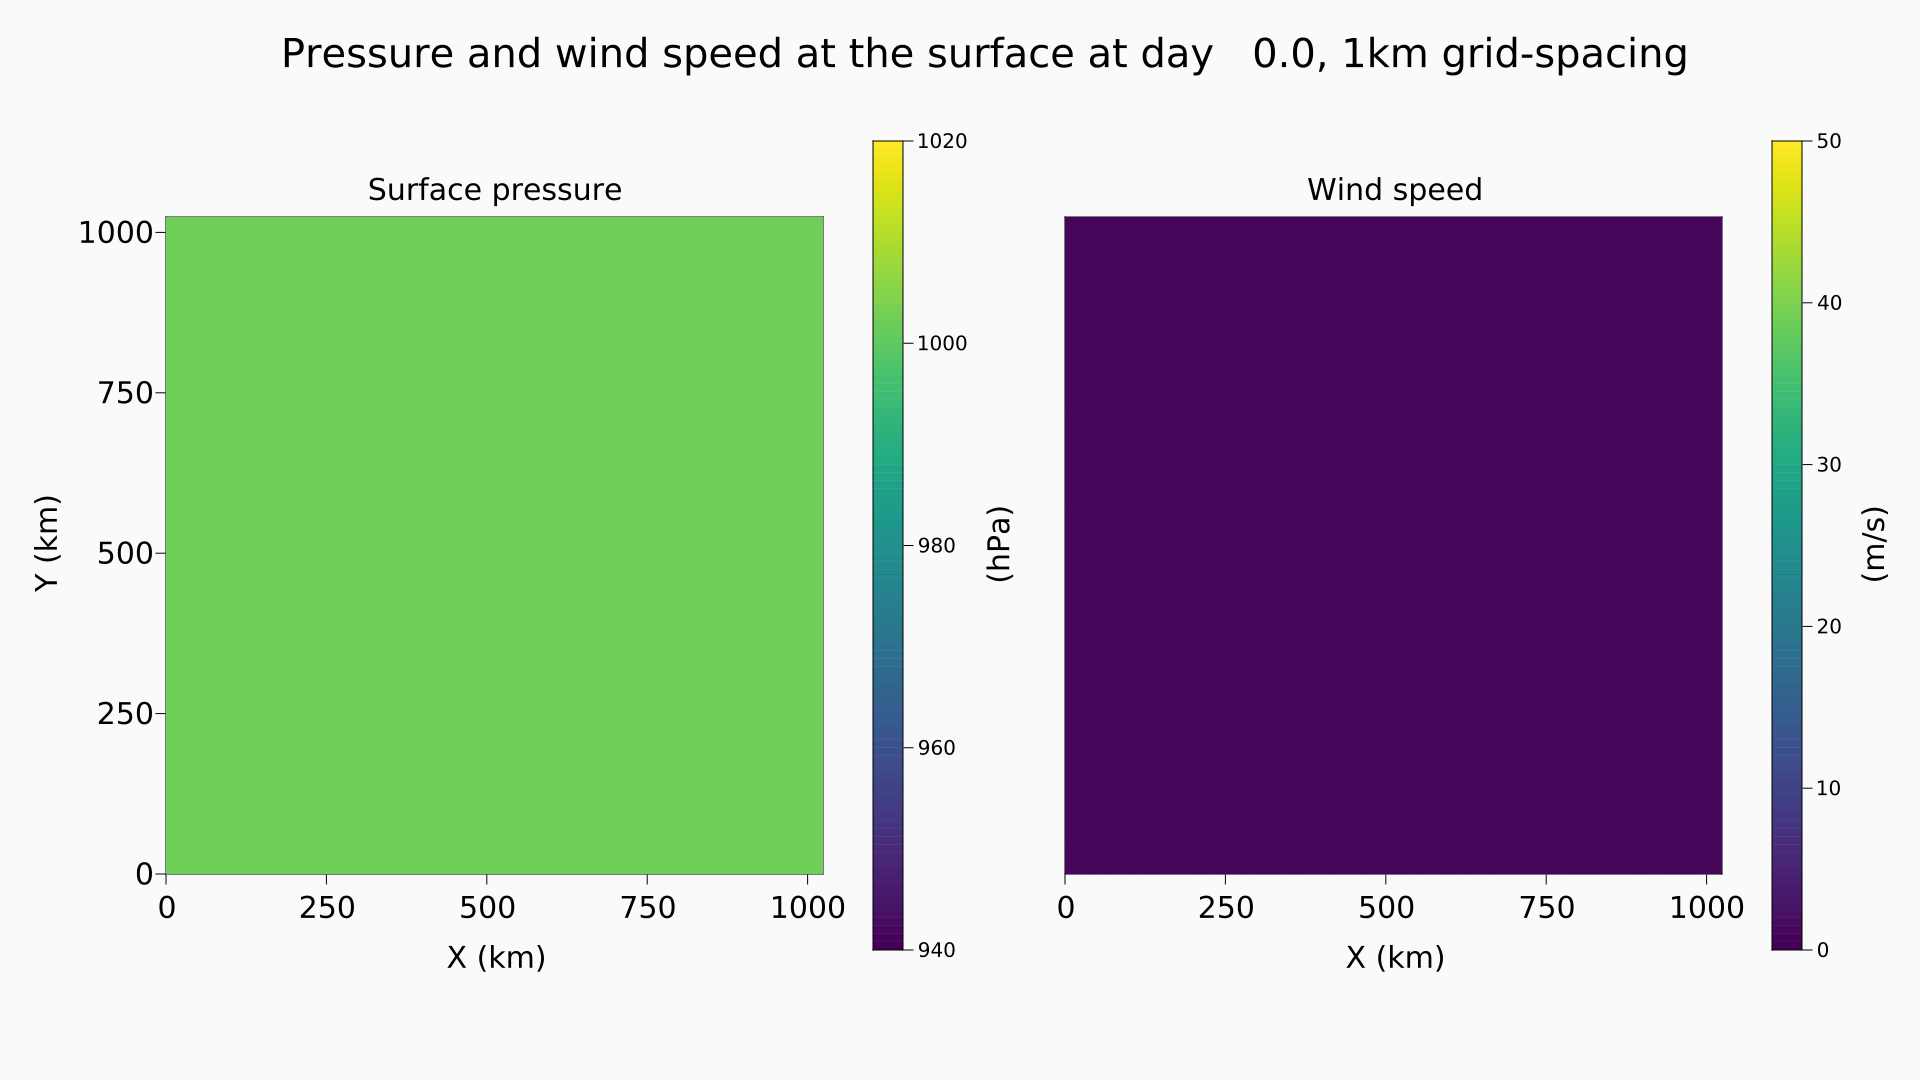

In [25]:
set_theme!(colgap=50,font=" DejaVu Sans")
#outer_padding = 30
#scene, layout = layoutscene(outer_padding, resolution = (1200, 700),backgroundcolor =RGBf0(0.98, 0.98, 0.98))
scene, layout = layoutscene(resolution = (1920,1080),backgroundcolor =RGBf0(0.98, 0.98, 0.98))
ax11 = layout[1, 1] = LAxis(scene, title = "Surface pressure", titlesize=30)
psfc11 = contour!(ax11,x,y, psfc_4, fillrange=true,colorrange = (940,1020))
cbar1 = layout[1,2] = LColorbar(scene, psfc11, label = "(hPa)",labelsize = 30)
cbar1.width=30
ax12 = layout[1, 3] = LAxis(scene, title = "Wind speed", titlesize=30)
sp12 = contour!(ax12,x,y, sp_4,fillrange=true,colorrange = (0, 50))
cbar2 = layout[1,4] = LColorbar(scene, sp12, label = "(m/s)",labelsize = 30)
cbar2.width=30
##Colorbar
ax11.aspect = AxisAspect(1)
ax12.aspect = AxisAspect(1)

ax11.ylabel = "Y (km)"
ax11.xlabel = "X (km)"
ax12.xlabel = "X (km)"
ax11.ylabelsize = 30
ax11.xlabelsize = 30
ax12.xlabelsize = 30


ax11.yticklabelsize = 30
ax11.xticklabelsize = 30
ax12.xticklabelsize = 30

linkaxes!(ax11, ax12)

tightlimits!.((ax11,ax12))

hideydecorations!(ax12, grid = false)


supertitle = layout[0, :] = LText(scene, time_string,
    textsize = 40)
scene

In [26]:
record(scene, joinpath(output_dir, "time_animation_1km.mp4"), timeindices; framerate = 10, compression = 0) do t
    time_idx[] = t 
end

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/time_animation_1km.mp4"

In [28]:
save(joinpath(output_dir,"snapshot_1km.eps"),scene)
save(joinpath(output_dir,"snapshot_1km.pdf"),scene)
save(joinpath(output_dir,"snapshot_1km.png"),scene)

All errors:
ArgumentError: Package ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.

ArgumentError: Argument does not support conversion to eps.


Errors encountered while save FileIO.File{FileIO.DataFormat{:EPS},String}("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/snapshot_1km.eps").

Fatal error:


LoadError: ArgumentError: Package ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.

_require(::Base.PkgId) at ./loading.jl:999
require(::Base.PkgId) at ./loading.jl:928
action(::Symbol, ::Array{Union{Base.PkgId, Module},1}, ::FileIO.Formatted, ::Scene; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /global/homes/a/aramreye/.julia/packages/FileIO/BUPwf/src/loadsave.jl:198
action at /global/homes/a/aramreye/.julia/packages/FileIO/BUPwf/src/loadsave.jl:192 [inlined]
action(::Symbol, ::Array{Union{Base.PkgId, Module},1}, ::Symbol, ::String, ::Scene; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /global/homes/a/aramreye/.julia/packages/FileIO/BUPwf/src/loadsave.jl:181
action at /global/homes/a/aramreye/.julia/packages/FileIO/BUPwf/src/loadsave.jl:181 [inlined]
save(::String, ::Scene; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at /global/homes/a/aramreye/.julia/packages/FileIO/BUPwf/src/loadsave.jl:129
save(::String, ::Scene) at /global/homes/a/aramreye/.julia/packages/FileIO/BUPwf/src/loadsave.jl:126
top-level scope at In[28]:1
include_string(::Function, ::Module, ::String, ::String) at ./loading.jl:1091
softscope_include_string(::Module, ::String, ::String) at /global/homes/a/aramreye/.julia/packages/SoftGlobalScope/u4UzH/src/SoftGlobalScope.jl:65
execute_request(::ZMQ.Socket, ::IJulia.Msg) at /global/homes/a/aramreye/.julia/packages/IJulia/tOM8L/src/execute_request.jl:67
#invokelatest#1 at ./essentials.jl:710 [inlined]
invokelatest at ./essentials.jl:709 [inlined]
eventloop(::ZMQ.Socket) at /global/homes/a/aramreye/.julia/packages/IJulia/tOM8L/src/eventloop.jl:8
(::IJulia.var"#15#18")() at ./task.jl:356